**# Step 1: Import libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import statsmodels.api as sm 

**# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**

In [7]:
np.random.seed(42)  # Ensuring reproducibility of random noise

X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values



In [4]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [5]:
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
 # Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

**# Step 3: Create a Linear regression model**

In [6]:
model=LinearRegression() # Initialize the model

**# Step 4: Train the model**

In [7]:
model.fit(X,Y) #model learns the best fit line by minimizing the error

LinearRegression()

**# Step 5: Get values of slope and intercept from trained model**

In [8]:
#coefficient of regression line
c = model.coef_[0]
print(f"Coefficient: {c}")
 
#calculate intercept
m = model.intercept_
print(f"Intercept: {m}")

Coefficient: 4.965498141580591
Intercept: 27.430065779800536


**# Step 6: Display equation of line**

In [9]:
print(f"Equation of line: Y= {m:.2f}X + {c:.2f}")


Equation of line: Y= 27.43X + 4.97


**# Step 7: Predict values using the model**

In [10]:
Y_pred = model.predict(X) #Predict salaries for the given experience values

**# Mean Squared Error (MSE): Measures avg squared diff b/w actual and predicted values**

In [11]:
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared error (MSE): {mse:.2f}")

Mean Squared error (MSE): 11.75


**# Mean Absolute Error (MSE): Measures avg squared diff b/w actual and predicted values**

In [12]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute error (MAE): {mae:.2f}")

Mean Absolute error (MAE): 2.87


**# Root Mean Squared Error (RMSE): Measures avg squared diff b/w actual and predicted values**

In [13]:
rmse = np.sqrt(mse)
print(f"Root mean squared error (RMSE): {rmse:.2f}")

Root mean squared error (RMSE): 3.43


**# R-squared (R*R) - Represents how well the model fits the data (0 to 1, where 1 is best)**

In [14]:
r2=r2_score(Y,Y_pred)
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 0.95


**# Adjusted R-squared (R2_adj) - Adjusted for the number of multiple regression**

In [15]:
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared: {adj_r2:.2f}")

Adjusted R-squared: 0.94


In [16]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:12:27   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**# Step 8: Plot the actual data points**

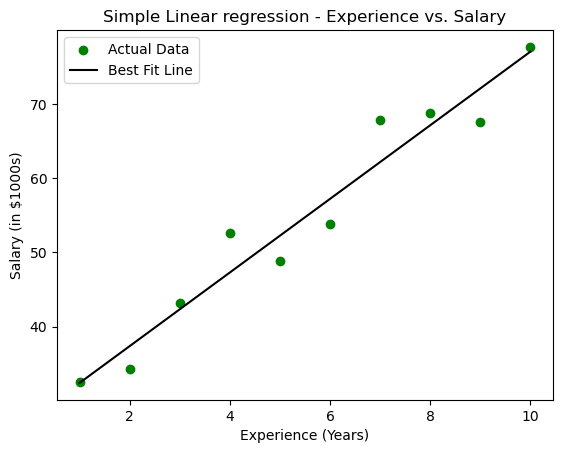

In [17]:
plt.scatter(X,Y,color='green',label='Actual Data')

# Step 9: Plot the Regression Line(Best Fit Line)
plt.plot(X,Y_pred,color='black',label='Best Fit Line') # Regression line
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (in $1000s)')
plt.title('Simple Linear regression - Experience vs. Salary')
plt.legend()

# Step 10: Add Labels and legend
plt.show()

In [ ]:
#user can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit): "))
        if exp == -1:
            break # Exit the loop
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number!")


Enter years of experience to predict salary (or -1 to exit): 5
Predicted salary for 5.0 years of experience: $52.26K
